In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [215]:
root = '/Volumes/DATA/adv-exp-physics/advancedlab3/data/20171115'
pos = 'pos.dat'
spec = 'spec.FDdat'
T = 262.84
kb = 1.38e-23
v = 8.9e-4
d = 3e-6
beta = 3*np.pi*v*d
mAarray = np.floor(np.linspace(25, 275,11)).astype(int)
runarray = [1,2,3]
def powerfunc(f,P0,f0):
    return (P0*f0**2)/(f**2 + f0**2)

In [283]:
alphaarray = np.zeros((11,3))
for i in range(11):
    for j in range(3):
        mA = mAarray[i]
        run = runarray[j]
        x, y, s = np.loadtxt(os.path.join(root,str(mA),str(run),pos), unpack=True)
        xmean = np.average(x)
        ymean = np.average(y)
        meansquare = np.average((x-xmean)**2 + (y-ymean)**2)
#         print meansquare
        alpha = kb*T/meansquare
#         print alpha
        alphaarray[i,j] = alpha
#         best_guess_f0 = alpha/(2*np.pi*beta)
#         best_guess_P0 = 2*kb*T/(np.pi*alpha*f0)
        # print best_guess_P0, best_guess_f0

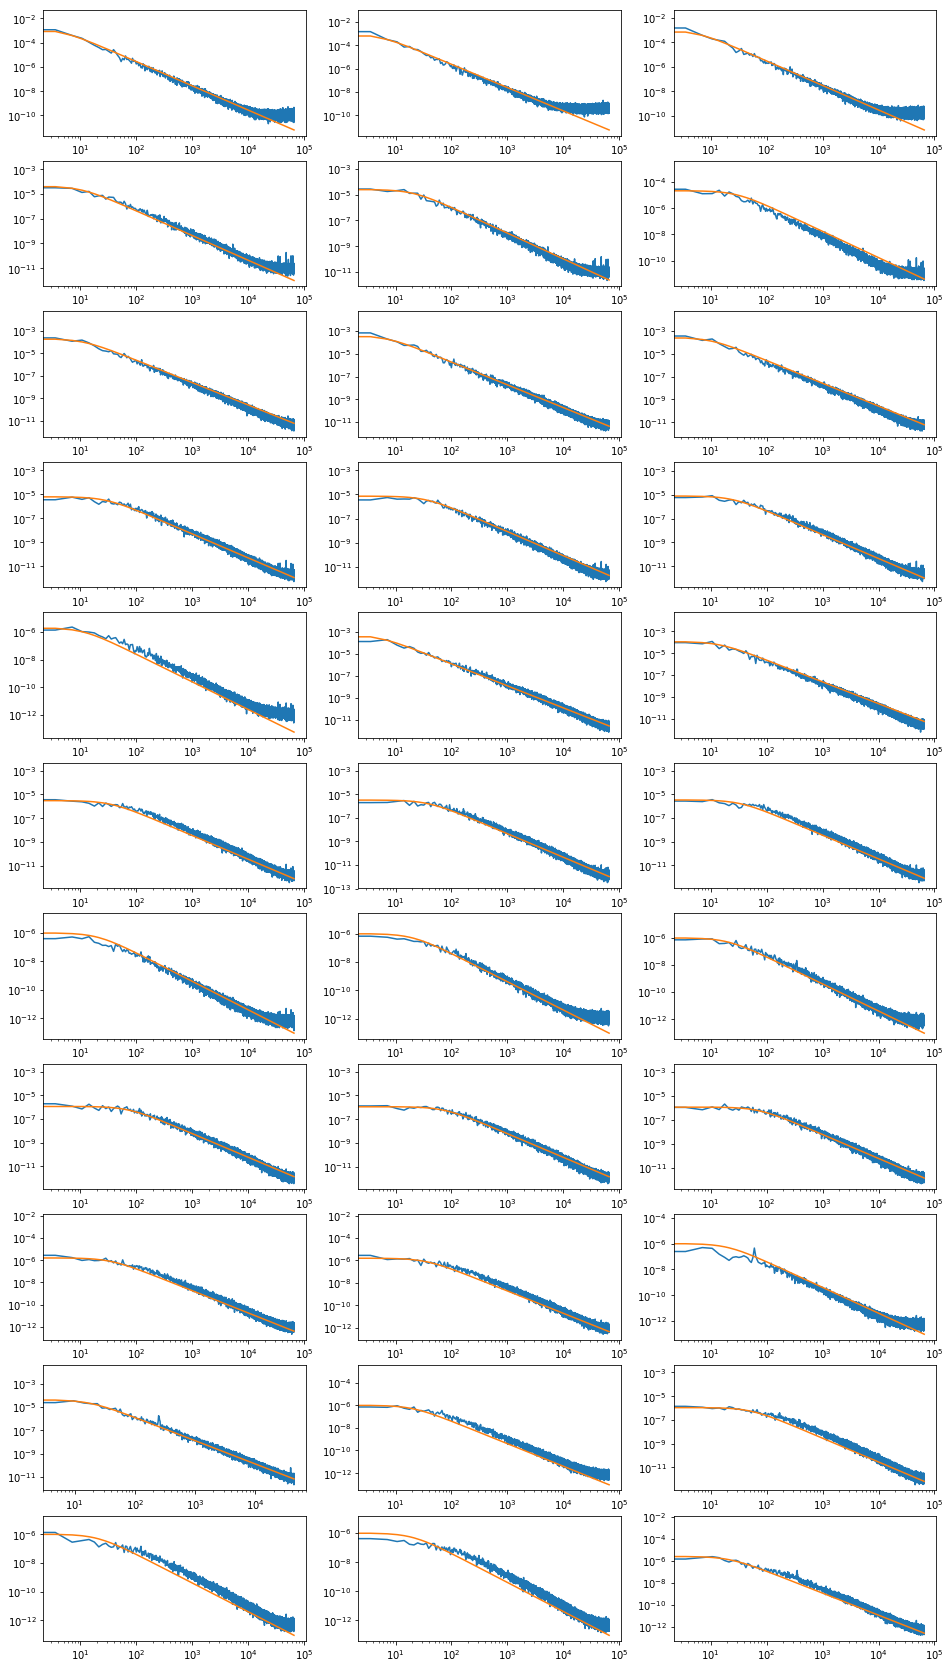

In [304]:
alphaprimearray = np.zeros((11,3))
fig, ax = plt.subplots(11,3, figsize=(16,30))

for i in range(11):
    for j in range(3):
        mA = mAarray[i]
        run = runarray[j]
        df = pd.read_table(os.path.join(root,str(mA),str(run),spec), sep='\s|,', engine='python', header=None, skiprows=4)
        f = df.values[:,0]
        intensity = df.values[:,1]
        try:
            params, mat = curve_fit(powerfunc, f[2:], intensity[2:], p0=[1e-6,20], bounds=([1e-8,0], [1e-2,100]), method='trf')
            P0 = params[0]
            f0 = params[1]
            sigP0 = mat[0,0]
            sigf0 = mat[1,1]
            
            ax[i,j].loglog(f, intensity)
            ax[i,j].loglog(f,powerfunc(f, params[0], params[1]))
            alphaprime = 2*kb*T/(np.pi*P0*f0)
            alphaprimearray[i,j] = alphaprime
        except:
            continue
        
        # print alphaprime

Text(0.5,0,u'laser current in mA')

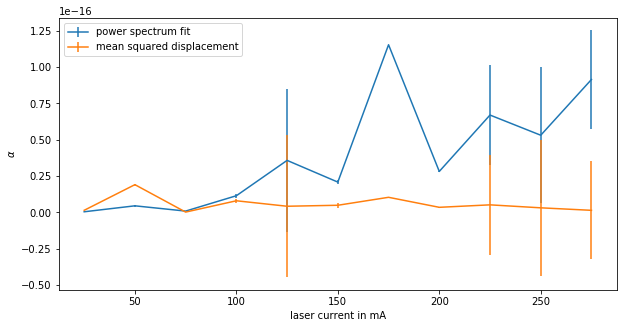

In [317]:
# print alphaprimearray
fig, ax = plt.subplots(figsize=(10,5))
ax.errorbar(mAarray,np.average(alphaprimearray, 1),np.std(alphaprimearray, axis=1), label='power spectrum fit')
# print alphaarray
ax.errorbar(mAarray,np.average(alphaarray, 1), np.std(alphaprimearray, axis=1), label='mean squared displacement')
ax.legend(loc=2)
ax.set_ylabel(r'$\alpha$')
ax.set_xlabel('laser current in mA')